In [1]:
from mapper_base import MapperBase
from astropy.io import fits
from astropy.table import Table

import mapper_eBOSS_QSO
import mapper_CMBK
import pyccl as ccl
import numpy as np
import pylab as plt
import pymaster as nmt
import healpy as hp

In [2]:
# Initialize binning scheme with 20 ells per bandpower
nside = 2048
nside_mask = 2048

ells = []
i = 11.5
while i <= 3 * nside:
    ells.append(round(i))
    #i = i*(1+i/(3 * nside))
    i = i+20*(1+i/240)
    
if ells[-1] <  3 * nside -1:   
    ells.append(3 * nside -1)

bands = nmt.NmtBin.from_edges(ells[:-1], ells[1:])
ell_arr = bands.get_effective_ells()

In [3]:
NGC_1_config = {'data_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_data-NGC-vDR16.fits'], 
          'random_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_random-NGC-vDR16.fits'],
          'z_edges':[0, 1.5],
          'nside':nside, 'nside_mask': nside_mask, 'mask_name': 'mask_QSO_NGC_1' }

NGC_2_config = {'data_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_data-NGC-vDR16.fits'], 
          'random_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_random-NGC-vDR16.fits'],
          'z_edges':[1.5, 3],
          'nside':nside, 'nside_mask': nside_mask, 'mask_name': 'mask_QSO_NGC_2'  }

SGC_1_config = {'data_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_data-SGC-vDR16.fits'], 
          'random_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_random-SGC-vDR16.fits'],
          'z_edges':[0.01, 1.5],
          'nside':nside, 'nside_mask': nside_mask, 'mask_name': 'mask_QSO_SGC_1' }

SGC_2_config = {'data_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_data-SGC-vDR16.fits'], 
          'random_catalogs':['/home/zcapjru/PhD/Data/eBOSS_QSO/eBOSS_QSO_clustering_random-SGC-vDR16.fits'],
          'z_edges':[1.5, 3],
          'nside':nside, 'nside_mask': nside_mask, 'mask_name': 'mask_QSO_SGC_1'  }

CMBK_config = {'file_klm':'/home/zcapjru/PhD/Data/COM_Lensing_2048_R2.00/dat_klm.fits', 
          'file_mask':'/home/zcapjru/PhD/Data/COM_Lensing_2048_R2.00/mask.fits.gz',
               'file_noise':'/home/zcapjru/PhD/Data/COM_Lensing_2048_R2.00/nlkk.dat', 'mask_name': 3,
          'nside':nside}

In [4]:
CMBK_maps = mapper_CMBK.MapperCMBK(CMBK_config)

NGC_1_maps = mapper_eBOSS_QSO.MappereBOSSQSO(NGC_1_config)
NGC_2_maps = mapper_eBOSS_QSO.MappereBOSSQSO(NGC_2_config)
SGC_1_maps = mapper_eBOSS_QSO.MappereBOSSQSO(SGC_1_config)
SGC_2_maps = mapper_eBOSS_QSO.MappereBOSSQSO(SGC_2_config)

/home/zcapjru/anaconda3/envs/PhD/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/home/zcapjru/anaconda3/envs/PhD/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/home/zcapjru/anaconda3/envs/PhD/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/home/zcapjru/anaconda3/envs/PhD/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


In [5]:
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.049, h=0.67, sigma8=0.81, n_s=0.96)

NGC_nz_1 = NGC_1_maps.get_nz()
NGC_nz_2 = NGC_2_maps.get_nz()
SGC_nz_1 = SGC_1_maps.get_nz()
SGC_nz_2 = SGC_2_maps.get_nz()

NGC_z_1 = NGC_nz_1[1]
NGC_dNdz_1 = NGC_nz_1[0]

NGC_z_2 = NGC_nz_2[1]
NGC_dNdz_2 = NGC_nz_2[0]

SGC_z_1 = SGC_nz_1[1]
SGC_dNdz_1 = SGC_nz_1[0]

SGC_z_2 = SGC_nz_2[1]
SGC_dNdz_2 = SGC_nz_2[0]

In [6]:
SGC_dNdz_1

array([ 751.28812986,  786.26646059,  840.56736645,  889.28362551,
        958.53602598,  920.24395928, 1005.58889601, 1007.51189896,
        966.14919517, 1023.35820716, 1018.4920416 , 1058.81951978,
       1065.3933006 , 1137.3902985 , 1146.59400155, 1157.24011947,
       1211.42490385, 1188.89322446, 1217.7814823 , 1219.32594535,
       1255.93443717, 1185.98020812, 1300.57274262, 1325.15757855,
       1373.14343586, 1437.43396721, 1482.28085558, 1359.85144927,
       1406.33393966, 1495.78026022, 1503.52590179, 1521.6903708 ,
       1519.13253863, 1440.36662614, 1482.40942632, 1622.20665661,
       1559.41320734, 1613.27764703, 1705.56178247, 1602.15313648,
       1636.47232631, 1550.43047866, 1590.4502384 , 1612.23239544,
       1545.80831806, 1566.31764154, 1565.7032971 , 1591.92908195,
       1524.29510816, 1601.11335533])

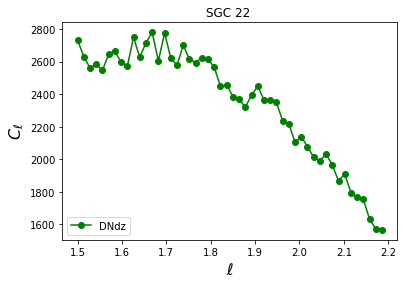

In [7]:
plt.plot(NGC_z_2, NGC_dNdz_2, 'go-', label='DNdz')

plt.title('SGC 22 ')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

In [8]:
#SGC_dNdz_1[74] = 305.5648125027277 #Super weird, it doesn't like 312 for some reason 

In [9]:
def get_cov_wsp(f1, f2, f3 = None, f4 = None):
    cw = nmt.NmtCovarianceWorkspace()
    cw.compute_coupling_coefficients(f1, f2, f3, f4)
    return cw

def get_cov(cl1, cl2, cl3, cl4, cw, wa, wb):
    return  nmt.gaussian_covariance(cw,
                                      0, 0, 0, 0,  # Spins of the 4 fields
                                      cl1,  # TT
                                      cl2,  # TT
                                      cl3,  # TT
                                      cl4,  # TT
                                      wa, wb=wb)

In [ ]:
m1 = SGC_1_maps.get_mask()
m2 = SGC_2_maps.get_mask()

f1 = SGC_1_maps.get_nmt_field()
f2 = SGC_2_maps.get_nmt_field()

w_11 = nmt.NmtWorkspace()
w_11.compute_coupling_matrix(f1, f1, bands)
      
w_12 = nmt.NmtWorkspace()
w_12.compute_coupling_matrix(f1, f2, bands)

w_22 = nmt.NmtWorkspace()
w_22.compute_coupling_matrix(f2, f2, bands)

#everything decoupled
nl11 = SGC_1_maps.get_nl_coupled()
nl22 = SGC_2_maps.get_nl_coupled()
nl12 = np.zeros_like(nl11)
nl21 = np.zeros_like(nl11)

cw_1111 = get_cov_wsp(f1, f1)
cw_1212 = get_cov_wsp(f1, f2)
cw_2222 = get_cov_wsp(f2, f2)

cl = nmt.compute_coupled_cell(f1, f1)/ np.mean(m1 * m1)
cov_1111 = get_cov(cl, cl, cl, cl, cw_1111, w_11, w_11)

cl11 = nmt.compute_coupled_cell(f1, f1)/ np.mean(m1 * m1)
cl12 = nmt.compute_coupled_cell(f1, f2)/ np.mean(m1 * m2)
cl21 = nmt.compute_coupled_cell(f2, f1)/ np.mean(m2 * m1)
cl22 = nmt.compute_coupled_cell(f2, f2)/ np.mean(m2 * m2)
cov_1212 = get_cov(cl11, cl12, cl21, cl22, cw_1212, w_11, w_22)

cl = nmt.compute_coupled_cell(f2, f2)/ np.mean(m2 * m2)
cov_2222 = get_cov(cl, cl, cl, cl, cw_2222, w_22, w_22)

err_11 = np.sqrt(cov_1111.diagonal())
err_12 = np.sqrt(cov_1212.diagonal())
err_22 = np.sqrt(cov_2222.diagonal())

In [ ]:
mk = CMBK_maps.get_mask()
fk = CMBK_maps.get_nmt_field()

w_k1 = nmt.NmtWorkspace()
w_k1.compute_coupling_matrix(f1, fk, bands)

w_k2 = nmt.NmtWorkspace()
w_k2.compute_coupling_matrix(f2, fk, bands)

w_kk = nmt.NmtWorkspace()
w_kk.compute_coupling_matrix(fk, fk, bands)

w_k1 = nmt.NmtWorkspace()
w_k1.compute_coupling_matrix(f1, fk, bands)

w_k2 = nmt.NmtWorkspace()
w_k2.compute_coupling_matrix(f2, fk, bands)

w_kk = nmt.NmtWorkspace()
w_kk.compute_coupling_matrix(fk, fk, bands)

cw_1k1k = get_cov_wsp(f1, fk)
cw_111k = get_cov_wsp(f1, f1, f1, fk)
cw_222k = get_cov_wsp(f2, f2, f2, fk)
cw_2k2k = get_cov_wsp(f2, fk)

cl11 = nmt.compute_coupled_cell(f1, f1)/ np.mean(m1 * m1)
cl1k = nmt.compute_coupled_cell(f1, fk)/ np.mean(m1 * mk)
clk1 = nmt.compute_coupled_cell(fk, f1)/ np.mean(mk * m1)
clkk = nmt.compute_coupled_cell(fk, fk)/ np.mean(mk * mk)
cov_1k1k = get_cov(cl11, cl1k, clk1, clkk, cw_1k1k, w_11, w_kk)

cl11 = nmt.compute_coupled_cell(f1, f1)/ np.mean(m1 * m1)
cl1k = nmt.compute_coupled_cell(f1, fk)/ np.mean(m1 * mk)
cov_111k = get_cov(cl11, cl1k, cl11, cl1k, cw_111k, w_11, w_k1)

cl22 = nmt.compute_coupled_cell(f2, f2)/ np.mean(m2 * m2)
cl2k = nmt.compute_coupled_cell(f2, fk)/ np.mean(m2 * mk)
cov_222k = get_cov(cl22, cl2k, cl22, cl2k, cw_222k, w_22, w_k2)

cl22 = nmt.compute_coupled_cell(f2, f2)/ np.mean(m2 * m2)
cl2k = nmt.compute_coupled_cell(f2, fk)/ np.mean(m2 * mk)
clk2 = nmt.compute_coupled_cell(fk, f2)/ np.mean(mk * m2)
clkk = nmt.compute_coupled_cell(fk, fk)/ np.mean(mk * mk)
cov_2k2k = get_cov(cl22, cl2k, clk2, clkk, cw_2k2k, w_22, w_kk)

err_1k = np.sqrt(cov_1k1k.diagonal())
err_2k = np.sqrt(cov_2k2k.diagonal())

In [ ]:
cl11 = w_11.decouple_cell(nmt.compute_coupled_cell(f1, f1)) - w_11.decouple_cell(nl11)
cl1k = w_k1.decouple_cell(nmt.compute_coupled_cell(f1, fk)) 
data_1 = np.zeros(2*len(cl11[0]))
data_1[:len(cl11[0])] =  cl11[0]
data_1[len(cl11[0]):] =  cl1k[0]

cl22 = w_22.decouple_cell(nmt.compute_coupled_cell(f2, f2)) - w_22.decouple_cell(nl11)
cl2k = w_k2.decouple_cell(nmt.compute_coupled_cell(f2, fk))
data_2 = np.zeros(2*len(cl22[0]))
data_2[:len(cl22[0])] =  cl22[0]
data_2[len(cl22[0]):] =  cl2k[0]

In [ ]:
def build_comp_cov(cov_aaaa, cov_aaab, cov_aabb):
    cov_abaa = np.transpose(cov_aaab)
    dim = len(cov_aaaa)
    comp_cov = np.zeros([2*dim, 2*dim])
    comp_cov[:dim,:dim] = cov_aaaa
    comp_cov[:dim,dim:] = cov_aaab
    comp_cov[dim:,:dim] = cov_abaa
    comp_cov[dim:,dim:] = cov_aabb
    return comp_cov

In [ ]:
comp_cov_1 = build_comp_cov(cov_1111, cov_111k, cov_1k1k)
comp_cov_2 = build_comp_cov(cov_2222, cov_222k, cov_2k2k)

In [ ]:
def theory(z, dNdz, b):
    b = b*np.ones(len(z))
    quasar = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(z, dNdz), bias=(z,b))
    CMB_shear = ccl.CMBLensingTracer(cosmo, 1100)
    clgg = ccl.angular_cl(cosmo, quasar, quasar, ell_arr) 
    clgs = ccl.angular_cl(cosmo, quasar, CMB_shear, ell_arr) 
    theory = np.zeros(2*len(clgg))
    theory[:len(clgg)] = clgg
    theory[len(clgg):] = clgs
    return theory

def gof(b):
    cov = comp_cov_1
    d = data_1
    inv_cov = np.linalg.inv(cov)
    t = theory(SGC_z_2, SGC_dNdz_2, b)
    return np.transpose(d-t)@inv_cov@(d-t)

In [ ]:
b_arr = np.linspace(0, 5, 100)

x2 = []
for item in b_arr:
    x2.append(gof(item))
x2 = np.array(x2)

pb = np.exp(-0.5*x2)
pb = pb/sum(pb)
best_b = b_arr[np.argmin(x2)]
best_x2 = min(x2)
mean_b = (sum(b_arr*pb))/(sum(pb))
sigma_b = np.sqrt((sum(np.abs(b_arr-mean_b)*pb))/(sum(pb)))
print(best_x2, best_b, mean_b, sigma_b)

In [ ]:
b_ngc = best_b*np.ones(len(NGC_z_1))
b_sgc = best_b*np.ones(len(SGC_z_1))

NGC_quasar1 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(NGC_z_1,NGC_dNdz_1), bias=(NGC_z_1,b_ngc))
NGC_quasar2 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(NGC_z_2,NGC_dNdz_2), bias=(NGC_z_2,b_ngc))
SGC_quasar1 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(SGC_z_1,SGC_dNdz_1), bias=(SGC_z_1,b_sgc))
SGC_quasar2 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(SGC_z_2,SGC_dNdz_2), bias=(SGC_z_2,b_sgc))
CMB_shear = ccl.CMBLensingTracer(cosmo, 1100)

NGC_theory_11 = ccl.angular_cl(cosmo, NGC_quasar1, NGC_quasar1, ell_arr) 
NGC_theory_12 = ccl.angular_cl(cosmo, NGC_quasar1, NGC_quasar2, ell_arr) 
NGC_theory_22 = ccl.angular_cl(cosmo, NGC_quasar2, NGC_quasar2, ell_arr) 
SGC_theory_11 = ccl.angular_cl(cosmo, SGC_quasar1, SGC_quasar1, ell_arr) 
SGC_theory_12 = ccl.angular_cl(cosmo, SGC_quasar1, SGC_quasar2, ell_arr) 
SGC_theory_22 = ccl.angular_cl(cosmo, SGC_quasar2, SGC_quasar2, ell_arr) 

NGC_shear1 = ccl.angular_cl(cosmo, CMB_shear, NGC_quasar1, ell_arr) 
NGC_shear2 = ccl.angular_cl(cosmo, CMB_shear, NGC_quasar2, ell_arr) 
SGC_shear1 = ccl.angular_cl(cosmo, CMB_shear, SGC_quasar1, ell_arr) 
SGC_shear2 = ccl.angular_cl(cosmo, CMB_shear, SGC_quasar2, ell_arr) 

In [ ]:
plt.errorbar(ell_arr, cl22[0], yerr=err_22, marker='s', ecolor='k', label='Empirical')
plt.plot(ell_arr, w_22.decouple_cell(nl22)[0], 'go-', label='Noise')
plt.plot(ell_arr, SGC_theory_22, 'r--', label='Best theory')


plt.loglog()
plt.xlim((ell_arr[0], ell_arr[-1]))
plt.title('SGC 22 ')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

In [ ]:
plt.plot(ell_arr, (SGC_theory_22-cl22[0])/err_22, 'ro-', label=r'$\frac{d-t}{\sigma}$')


#plt.loglog()
plt.xlim((ell_arr[0], ell_arr[-1]))
plt.title('Residuals SGC 22 ')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

In [ ]:
plt.errorbar(ell_arr, cl2k[0], yerr=err_2k, marker='s', ecolor='k', label='Empirical')
plt.plot(ell_arr, SGC_shear2, 'r--', label='Best theory')


plt.loglog()
plt.xlim((ell_arr[0], ell_arr[-1]))
plt.title('SGC_2-Shear')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

In [ ]:
plt.plot(ell_arr, (SGC_shear2-cl2k[0])/err_2k, 'ro-', label=r'$\frac{d-t}{\sigma}$')


#plt.loglog()
plt.xlim((ell_arr[0], ell_arr[-1]))
plt.title('Residuals SGC 2k ')
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$C_\\ell$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()

In [ ]:
plt.plot(b_arr, pb, 'r-', label='P(b)')
plt.text(0, 0.09, 'best b ='+'{}'.format(best_b))
plt.text(0, 0.07, r'$\bar{b}$ ='+'{}'.format(mean_b))
plt.text(0, 0.05, r'$\sigma b$ ='+'{}'.format(sigma_b))
plt.text(0, 0.03, r'$\chi^2$ ='+'{}'.format(best_x2))
plt.title('SGC_2+Shear')
plt.xlabel('$b$', fontsize=16)
plt.ylabel('$P(b)$', fontsize=16)
plt.legend(loc='lower left', ncol=2, labelspacing=0.1)
plt.show()